In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import maeda as mda
import seaborn as sns

ModuleNotFoundError: No module named '_maeda'

In [ ]:
data_path = 'Model/task2maeda_a_zero_chrontest/'
predicted_a = pd.read_csv(data_path + 'results/predicted_positions_3terms.csv',index_col=0)
predicted_a2 = pd.read_csv(data_path + 'results/predicted_positions_2terms.csv',index_col=0)
walk_start = np.loadtxt(data_path + 'data/walk_start.csv')
actual_a = pd.read_csv(data_path + 'data/x_raw.csv',index_col=0)
pos_cols = ['jaw','tongue','shape','apex','lip_ht','lip_pr']
actual_a

In [30]:
walks = []
walk = []
walk.append(predicted_a.loc[0,'mse_loss'])
for i,p in enumerate(predicted_a['walk_start'][1:]):
    if p == 0:
        walk.append(predicted_a.loc[i,'mse_loss'])
    else:
        walks.append(walk)
        walk = []

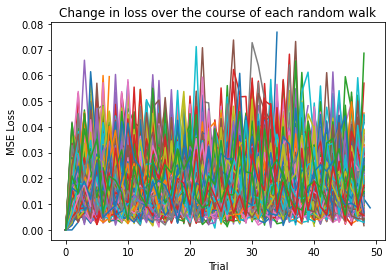

In [31]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.set_title('Change in loss over the course of each random walk')
ax.set_xlabel('Trial')
ax.set_ylabel('MSE Loss')
for w in walks:
    x = range(0,len(w))
    y = w
    ax.plot(x,y)
plt.show()

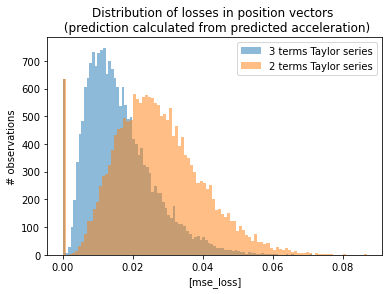

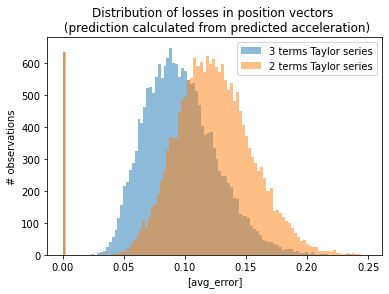

In [32]:
def draw_loss_dist(df,df2=pd.DataFrame(),loss_col='mse_loss',xlim=None,legend=None):
    fig = plt.figure()
    ax = plt.subplot(1,1,1)
    ax.hist(df[loss_col],bins=100,alpha=0.5)
    if not df2.empty:
        ax.hist(df2[loss_col],bins=100,alpha=0.5)
    ax.set_ylabel('# observations')
    ax.set_xlabel('[' + loss_col + ']')
    ax.set_title('Distribution of losses in position vectors \n (prediction calculated from predicted acceleration)')
    if xlim:
        ax.set_xlim(xlim)
    if legend:
        ax.legend(legend)
    plt.show()
draw_loss_dist(predicted_a,predicted_a2,loss_col='mse_loss',legend=['3 terms Taylor series','2 terms Taylor series'])
draw_loss_dist(predicted_a,predicted_a2,loss_col='avg_error',legend=['3 terms Taylor series','2 terms Taylor series'])

In [33]:
predicted_a_large_err = predicted_a[predicted_a['mse_loss'] > 0.05]
predicted_a_large_err = predicted_a_large_err.filter(pos_cols)
predicted_a_large_err.head()

,jaw,tongue,shape,apex,lip_ht,lip_pr
138,0.258093,3.361518,1.668326,-4.399807,0.661755,-1.397615
149,-0.538336,2.971475,1.528324,-4.692823,1.048113,-1.320641
152,-2.528709,0.411519,-2.275704,-1.011097,0.351673,-2.739459
154,-2.607373,0.519271,-2.241841,-0.583870,0.033033,-3.191412
854,-3.146932,0.750104,1.006319,-3.526037,1.819701,0.557835


Predicted F:  [ 502.   889.5 2308.  3594.5 4175.5]
Actual F:  [ 487.   892.5 2316.  3566.  4144.5]
Avg err, F1-F3:  9.0


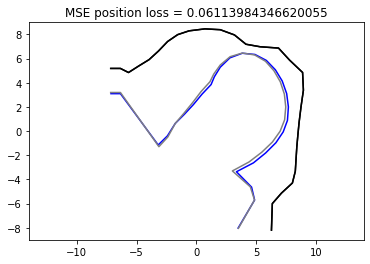

Predicted F:  [ 542.5  984.5 2336.  3564.5 4146. ]
Actual F:  [ 542.5 1004.5 2347.  3527.5 4123.5]
Avg err, F1-F3:  10.0


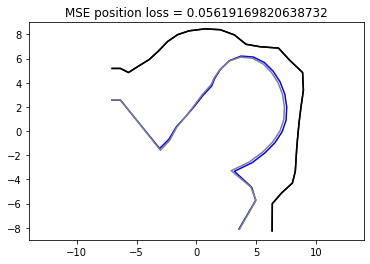

Predicted F:  [ 679.  1553.5 2565.  3733.  4405. ]
Actual F:  [ 669.5 1541.5 2524.5 3653.5 4357.5]
Avg err, F1-F3:  10.75


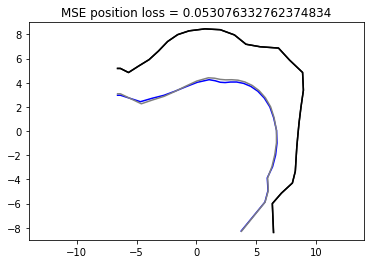

Predicted F:  [ 678.  1517.  2509.  3694.5 4438.5]
Actual F:  [ 679.  1566.5 2531.  3659.  4371. ]
Avg err, F1-F3:  25.25


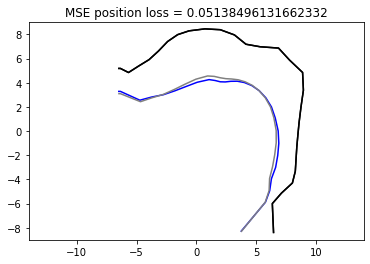

Predicted F:  [ 629.5 1304.5 2362.5 3443.  4027. ]
Actual F:  [ 622.  1280.5 2366.  3441.5 4017.5]
Avg err, F1-F3:  15.75


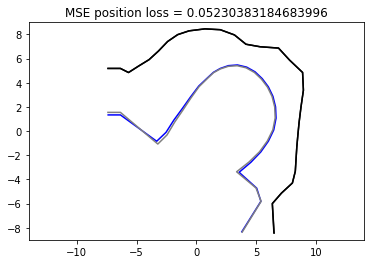

Predicted F:  [ 573.5 1456.5 2384.  3524.5 4084.5]
Actual F:  [ 597.  1430.  2391.  3539.5 4099.5]
Avg err, F1-F3:  25.0


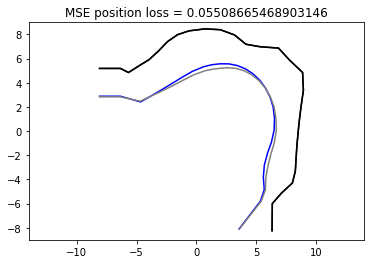

Predicted F:  [ 693.5 1520.5 2520.5 3480.5 4160.5]
Actual F:  [ 685.  1527.5 2487.5 3487.5 4135.5]
Avg err, F1-F3:  7.75


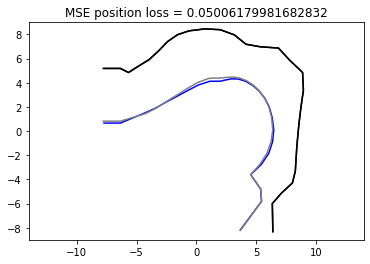

Predicted F:  [ 567.  1344.  1985.  3284.5 4031. ]
Actual F:  [ 558.  1461.  2093.5 3295.5 3986. ]
Avg err, F1-F3:  63.0


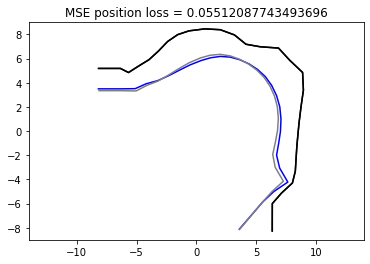

Predicted F:  [ 551.  1149.5 1872.  3261.5 4145. ]
Actual F:  [ 558.  1279.5 1961.  3286.  4146. ]
Avg err, F1-F3:  68.5


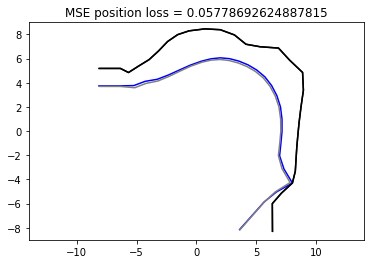

Predicted F:  [ 478.  1504.5 2145.5 3324.  4176. ]
Actual F:  [ 462.  1545.5 2209.  3324.  4105.5]
Avg err, F1-F3:  28.5


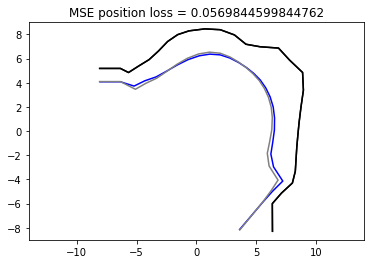

Predicted F:  [ 582.5 1377.  2420.  3753.5 4241.5]
Actual F:  [ 573.  1380.5 2415.  3724.5 4236.5]
Avg err, F1-F3:  6.5


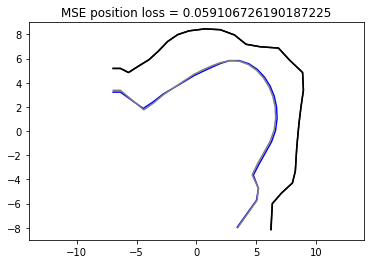

Predicted F:  [ 743.  1649.5 2673.5 3513.5 4081.5]
Actual F:  [ 725.5 1673.5 2657.5 3489.5 4041.5]
Avg err, F1-F3:  20.75


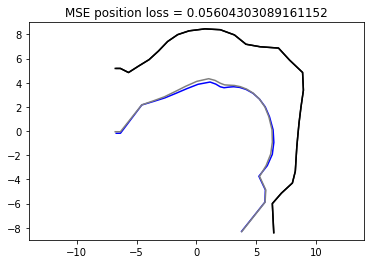

Predicted F:  [ 591.  1238.5 2309.  3610.5 4076. ]
Actual F:  [ 564.5 1233.5 2322.  3606.5 4081.5]
Avg err, F1-F3:  15.75


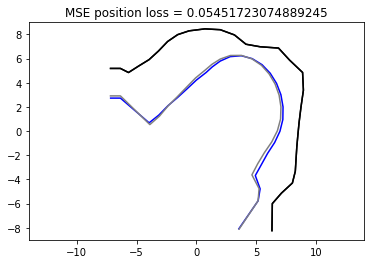

Predicted F:  [ 502.5 1166.  2322.5 3526.5 4083.5]
Actual F:  [ 511.  1190.  2337.5 3533.5 4114.5]
Avg err, F1-F3:  16.25


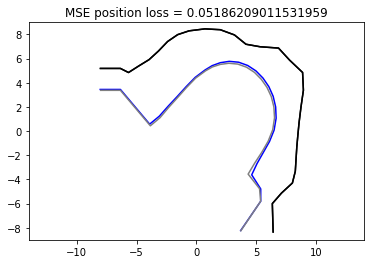

Predicted F:  [ 542.  1086.  2258.  3467.5 3919.5]
Actual F:  [ 527.  1110.5 2281.  3476.5 3961. ]
Avg err, F1-F3:  19.75


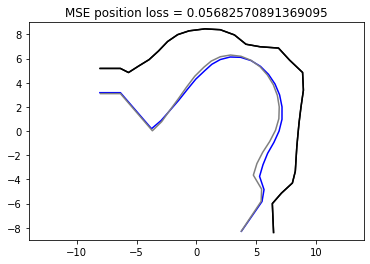

Predicted F:  [ 533.   927.  2254.  3627.5 4257.5]
Actual F:  [ 533.5  945.  2281.  3589.5 4235. ]
Avg err, F1-F3:  9.25


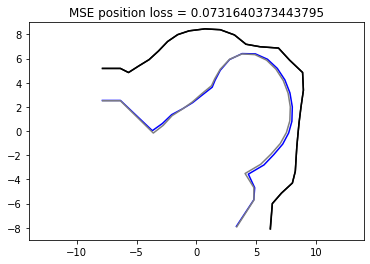

Predicted F:  [ 296.  1230.  2248.5 3519.  4160. ]
Actual F:  [ 380.  1291.5 2296.  3564.5 4230. ]
Avg err, F1-F3:  72.75


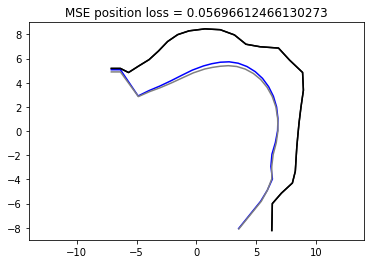

Predicted F:  [ 428.  1024.5 2302.5 3307.5 4024. ]
Actual F:  [ 371.   981.5 2321.5 3286.5 4027.5]
Avg err, F1-F3:  50.0


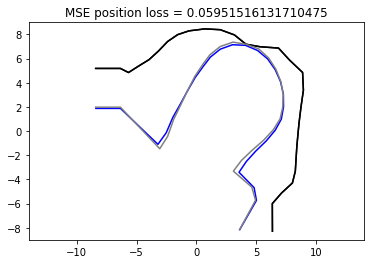

Predicted F:  [ 647.5 1366.  2491.5 3684.5 4252.5]
Actual F:  [ 639.  1383.  2467.  3660.5 4220.5]
Avg err, F1-F3:  12.75


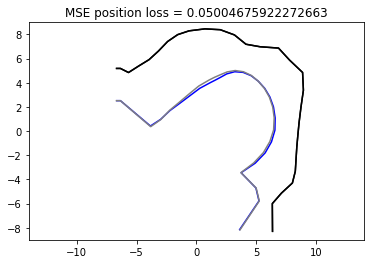

Predicted F:  [ 453.  1307.  2052.  3491.5 4840. ]
Actual F:  [ 429.  1229.  2022.  3501.5 4868. ]
Avg err, F1-F3:  51.0


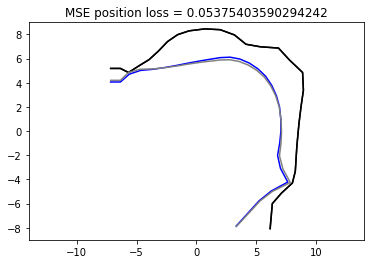

Predicted F:  [ 347.5 1483.5 2508.5 3737.5 4412. ]
Actual F:  [ 355.  1510.  2547.  3756.5 4462. ]
Avg err, F1-F3:  17.0


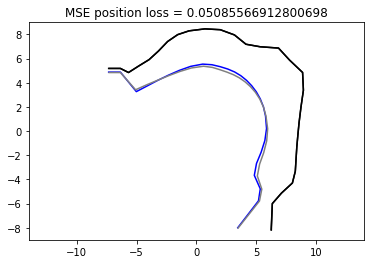

Predicted F:  [ 493.  1543.  2529.  3763.5 4406. ]
Actual F:  [ 518.5 1536.  2547.5 3781.5 4444. ]
Avg err, F1-F3:  16.25


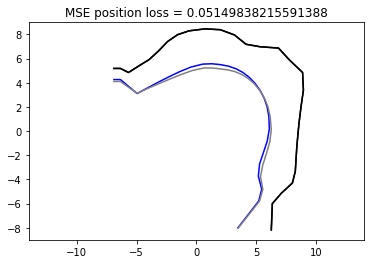

Predicted F:  [ 613.5 1496.5 2506.  3715.5 4315.5]
Actual F:  [ 613.  1507.5 2483.  3679.5 4287.5]
Avg err, F1-F3:  5.75


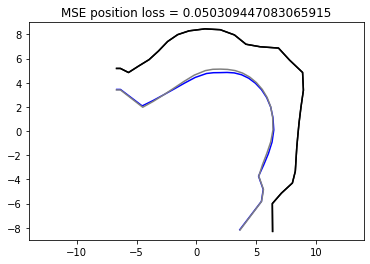

Predicted F:  [ 573.5 1271.5 2355.5 3582.5 4114. ]
Actual F:  [ 574.5 1295.5 2361.5 3572.5 4128. ]
Avg err, F1-F3:  12.5


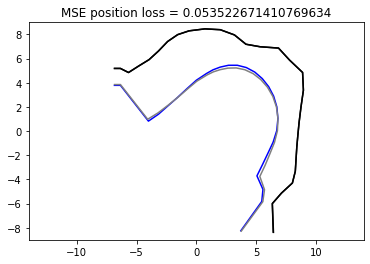

Predicted F:  [ 591.  1305.5 2364.  3575.5 4154.5]
Actual F:  [ 597.5 1269.5 2353.5 3578.5 4113. ]
Avg err, F1-F3:  21.25


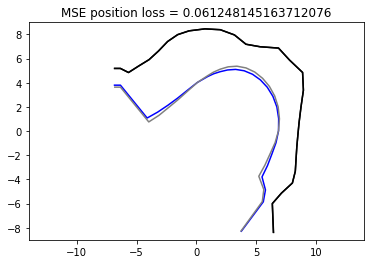

Predicted F:  [ 444.   999.5 2133.  3666.5 3970.5]
Actual F:  [ 384.   972.  2142.5 3638.  4008.5]
Avg err, F1-F3:  43.75


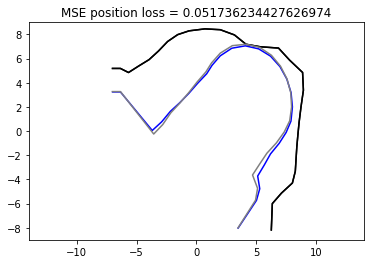

Predicted F:  [ 502.   821.5 2171.5 3476.  3910. ]
Actual F:  [ 502.   846.5 2220.  3456.5 3941.5]
Avg err, F1-F3:  12.5


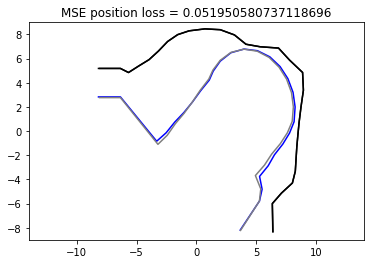

Predicted F:  [ 272.  1030.5 2204.5 3368.  3912.5]
Actual F:  [ 296.  1086.5 2221.  3359.  3943. ]
Avg err, F1-F3:  40.0


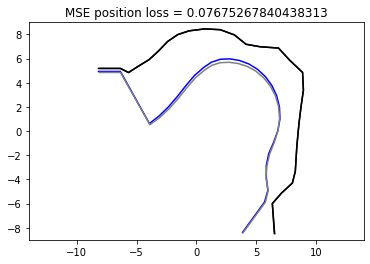

Predicted F:  [ 484.  1526.5 2481.5 3629.5 4141.5]
Actual F:  [ 469.5 1592.  2513.  3605.5 4157.5]
Avg err, F1-F3:  40.0


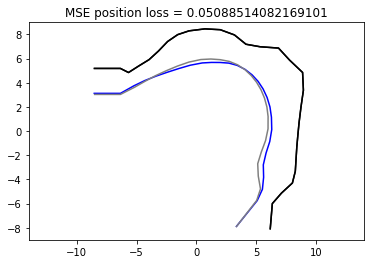

Predicted F:  [ 422.  1471.5 2465.  3629.5 4219. ]
Actual F:  [ 422.  1512.  2467.5 3595.5 4230.5]
Avg err, F1-F3:  20.25


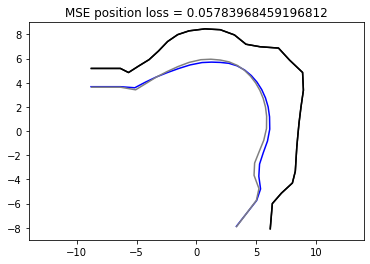

Predicted F:  [ 395.5 1093.  2332.  3543.5 4176.5]
Actual F:  [ 413.  1107.5 2328.5 3531.  4180. ]
Avg err, F1-F3:  16.0


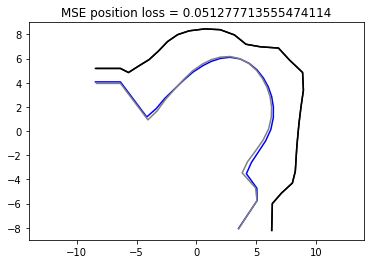

Predicted F:  [ 669.5 1015.5 2374.  3842.5 4276. ]
Actual F:  [ 663.  1084.  2377.5 3790.5 4206.5]
Avg err, F1-F3:  37.5


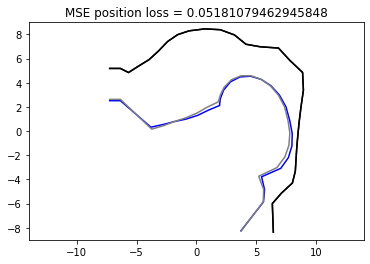

Predicted F:  [ 502.   923.  2218.  3599.5 3978.5]
Actual F:  [ 478.5  899.  2228.  3586.5 3974.5]
Avg err, F1-F3:  23.75


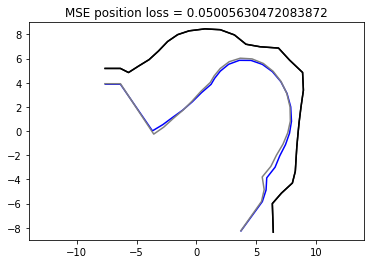

Predicted F:  [ 613.  1204.5 2358.  3538.5 4101.5]
Actual F:  [ 606.  1179.5 2365.5 3537.5 4124.5]
Avg err, F1-F3:  16.0


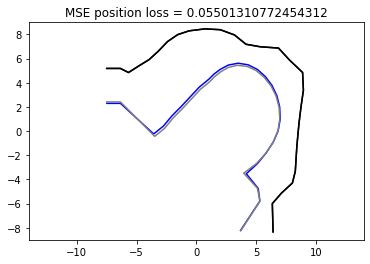

Predicted F:  [ 468.5  846.5 2094.5 3782.5 4029. ]
Actual F:  [ 428.   849.  2138.  3777.5 4073. ]
Avg err, F1-F3:  21.5


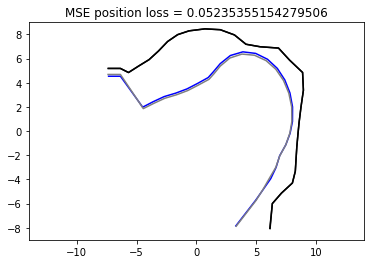

Predicted F:  [ 662.  1496.5 2440.5 3576.5 4096.5]
Actual F:  [ 637.5 1561.5 2417.5 3537.5 4073.5]
Avg err, F1-F3:  44.75


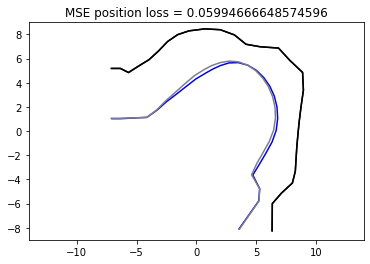

Predicted F:  [ 653.  1567.5 2495.5 3599.5 4159.5]
Actual F:  [ 653.  1583.5 2495.5 3591.5 4167.5]
Avg err, F1-F3:  8.0


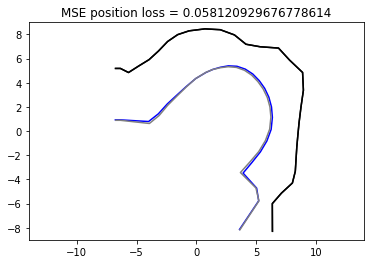

Predicted F:  [ 678.  1124.  2343.5 3748.5 4228.5]
Actual F:  [ 671.  1164.5 2344.5 3709.5 4181.5]
Avg err, F1-F3:  23.75


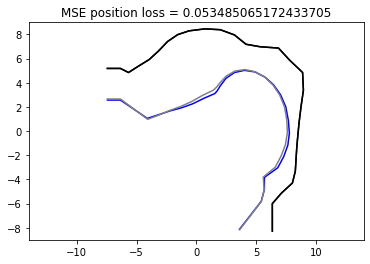

Predicted F:  [ 703.5 1221.5 2336.  3660.5 4124.5]
Actual F:  [ 687.5 1205.5 2311.  3668.5 4092.5]
Avg err, F1-F3:  16.0


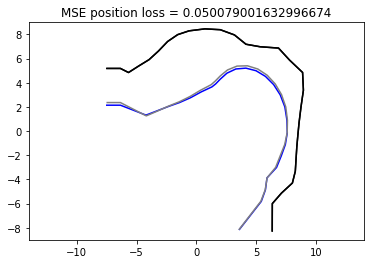

Predicted F:  [ 606.  1236.  2328.5 3667.  4120. ]
Actual F:  [ 607.  1254.5 2353.5 3668.  4139. ]
Avg err, F1-F3:  9.75


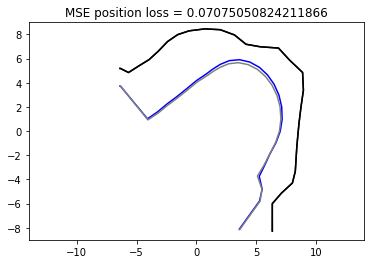

Predicted F:  [ 629.  1171.5 2320.5 3674.  4112.5]
Actual F:  [ 597.  1157.5 2312.  3635.5 4078. ]
Avg err, F1-F3:  23.0


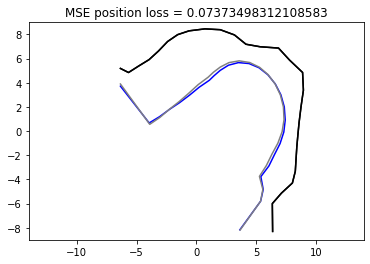

Predicted F:  [ 598.  1026.  2214.5 3651.5 3994. ]
Actual F:  [ 589.5 1058.5 2247.  3634.5 4006. ]
Avg err, F1-F3:  20.5


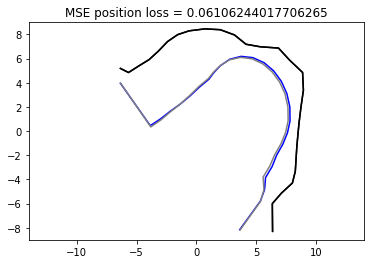

Predicted F:  [ 484.5 1423.  2354.5 3575.  4238. ]
Actual F:  [ 453.  1430.5 2360.  3551.  4216. ]
Avg err, F1-F3:  19.5


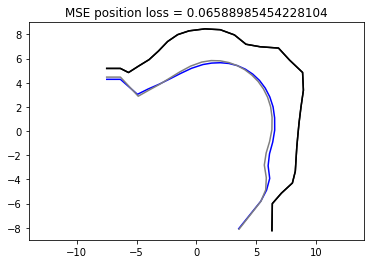

Predicted F:  [ 413.5 1254.5 2340.  3538.  4154.5]
Actual F:  [ 422.  1312.  2357.  3530.5 4169.5]
Avg err, F1-F3:  33.0


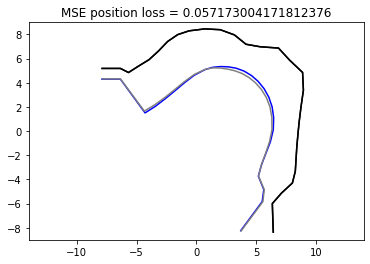

Predicted F:  [ 548.5 1371.5 2093.5 3427.  4126. ]
Actual F:  [ 533. 1350. 2126. 3443. 4046.]
Avg err, F1-F3:  18.5


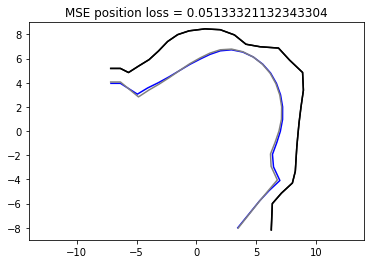

Predicted F:  [ 647.  1377.  2488.5 3697.5 4257.5]
Actual F:  [ 638.  1381.5 2456.  3652.5 4220.5]
Avg err, F1-F3:  6.75


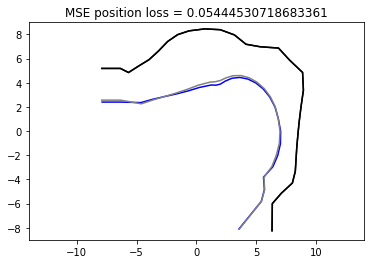

Predicted F:  [ 631.  1722.5 2618.5 3642.5 4170.5]
Actual F:  [ 638.5 1722.5 2634.5 3634.5 4202.5]
Avg err, F1-F3:  3.75


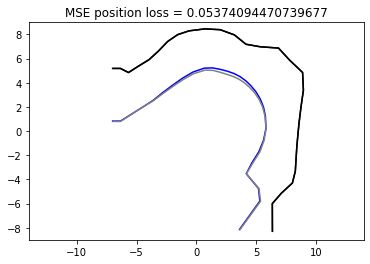

Predicted F:  [ 598.  1062.5 2177.5 3407.  4156. ]
Actual F:  [ 566.  1047.5 2179.5 3385.  4149. ]
Avg err, F1-F3:  23.5


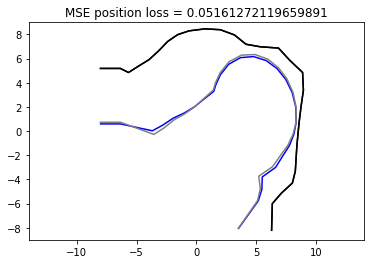

Predicted F:  [ 742.5 1239.5 2386.  3674.  4154. ]
Actual F:  [ 742.  1263.5 2383.5 3623.5 4103.5]
Avg err, F1-F3:  12.25


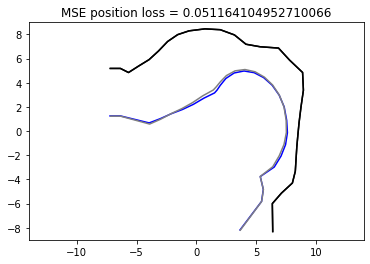

Predicted F:  [ 509.5 1591.  2575.5 3752.5 4422. ]
Actual F:  [ 502.  1575.5 2571.  3741.  4426. ]
Avg err, F1-F3:  11.5


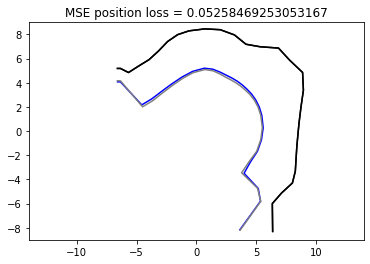

Predicted F:  [ 429.  1616.5 2763.5 4069.5 4808. ]
Actual F:  [ 395.5 1662.5 2842.  4131.5 4894. ]
Avg err, F1-F3:  39.75


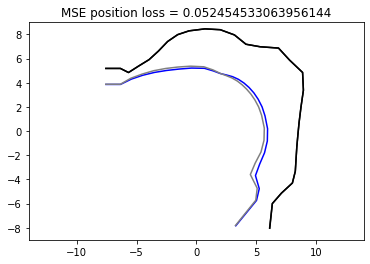

Predicted F:  [800.   0.   0.   0.   0.]
Actual F:  [ 432.   792.  2206.  3571.  4297.5]
Avg err, F1-F3:  580.0


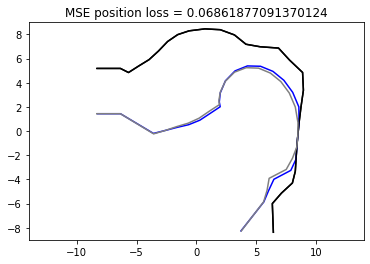

Predicted F:  [ 518.5 1770.  2701.  3693.  4173. ]
Actual F:  [ 518.  1800.5 2715.  3667.  4219. ]
Avg err, F1-F3:  15.5


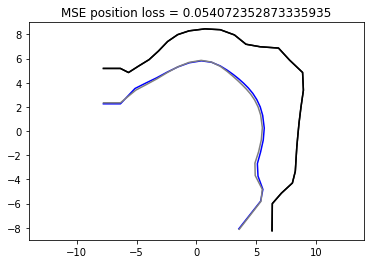

Predicted F:  [ 782.5 1239.5 2344.  3616.  4120. ]
Actual F:  [ 782.5 1279.5 2323.  3539.  4059. ]
Avg err, F1-F3:  20.0


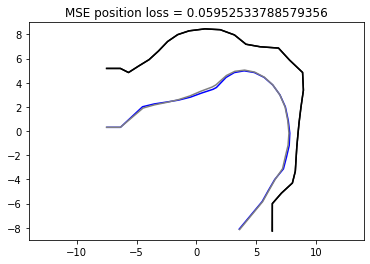

Predicted F:  [ 478.  1062.  2170.5 3505.  3983. ]
Actual F:  [ 462.  1062.  2185.  3486.5 3965. ]
Avg err, F1-F3:  8.0


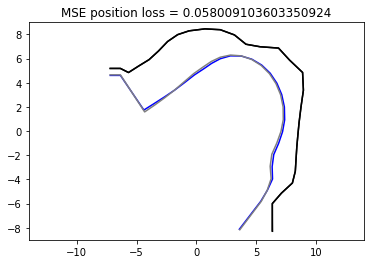

Predicted F:  [ 502.   781.5 2106.5 3518.5 3838. ]
Actual F:  [ 511.   773.5 2143.5 3524.5 3875.5]
Avg err, F1-F3:  8.5


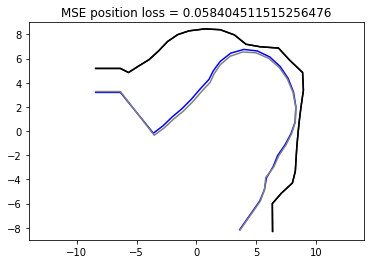

Predicted F:  [ 360.   648.  2055.5 3552.5 3953. ]
Actual F:  [ 428.   639.5 2014.  3528.5 3871. ]
Avg err, F1-F3:  38.25


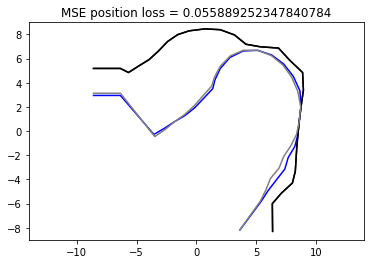

Predicted F:  [ 389.5 1417.5 2510.  3712.5 4400. ]
Actual F:  [ 389.  1400.5 2469.5 3666.5 4347.5]
Avg err, F1-F3:  8.75


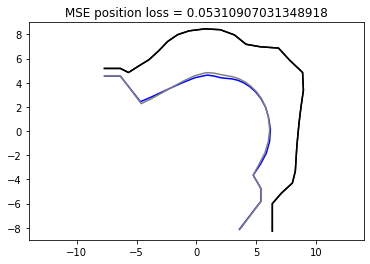

Predicted F:  [ 677.  1070.5 1905.  3312.5 3672.5]
Actual F:  [ 671.  1155.5 1908.5 3277.  3650. ]
Avg err, F1-F3:  45.5


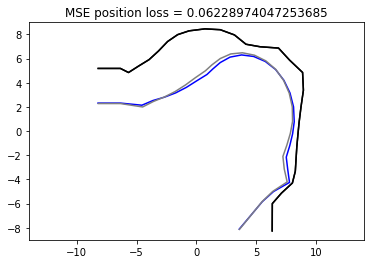

Predicted F:  [ 663.  1162.5 1876.5 3248.  3621. ]
Actual F:  [ 678.  1132.5 1942.  3332.5 3644.5]
Avg err, F1-F3:  22.5


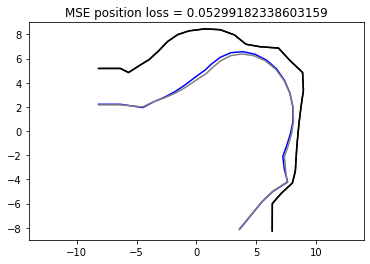

Predicted F:  [ 613.5 1066.5 1844.5 3266.5 3667. ]
Actual F:  [ 631.5 1000.  1891.  3317.5 3699. ]
Avg err, F1-F3:  42.25


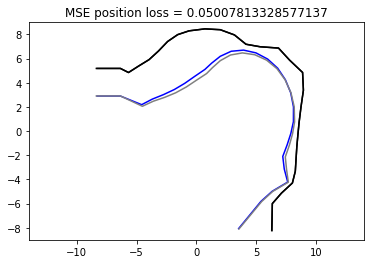

Predicted F:  [ 615.  1009.  1787.5 3200.5 3674. ]
Actual F:  [ 638.  1043.5 1878.5 3282.5 3699. ]
Avg err, F1-F3:  28.75


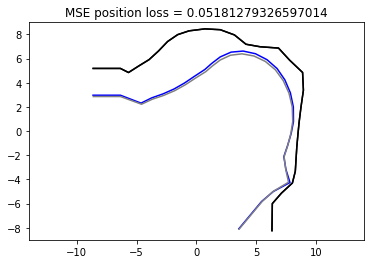

Predicted F:  [ 349.   829.  2294.  3586.  4139.5]
Actual F:  [ 296.   794.5 2300.  3543.5 4135. ]
Avg err, F1-F3:  43.75


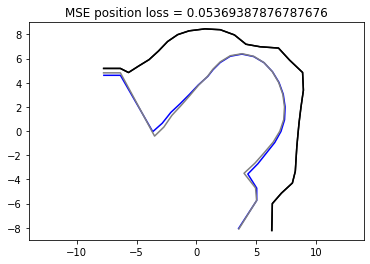

Predicted F:  [ 380. 1349. 2368. 3538. 4194.]
Actual F:  [ 380.  1351.  2394.  3582.5 4237.5]
Avg err, F1-F3:  1.0


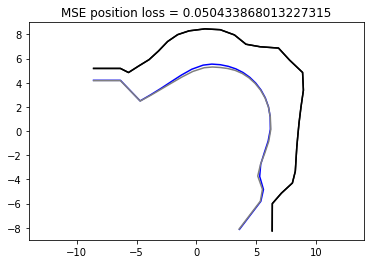

Predicted F:  [ 678.5 1511.  2395.  3491.  4011. ]
Actual F:  [ 678.  1534.5 2386.  3482.  3962. ]
Avg err, F1-F3:  12.0


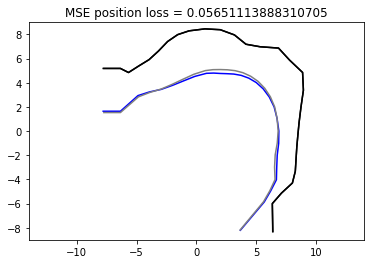

Predicted F:  [ 613.5 1297.5 2372.5 3609.  4220.5]
Actual F:  [ 613.  1329.5 2381.5 3599.  4201.5]
Avg err, F1-F3:  16.25


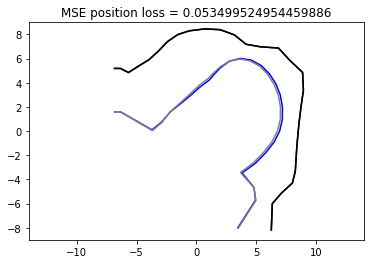

Predicted F:  [ 620.5 1452.5 2361.  3590.5 4134.5]
Actual F:  [ 629.5 1476.5 2389.  3602.5 4178.5]
Avg err, F1-F3:  16.5


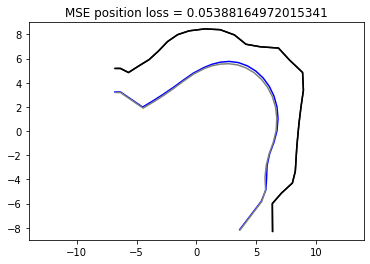

Predicted F:  [ 484.  1118.5 1591.  3182.  4065. ]
Actual F:  [ 459.  1291.5 1721.5 3209.5 4044. ]
Avg err, F1-F3:  99.0


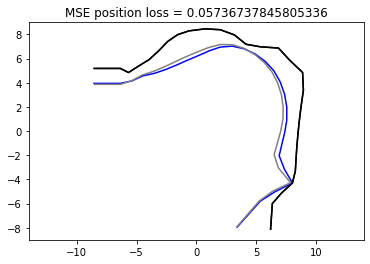

Predicted F:  [ 392.   883.5 2050.  3593.  3916.5]
Actual F:  [ 410.   907.5 2112.  3551.5 3970. ]
Avg err, F1-F3:  21.0


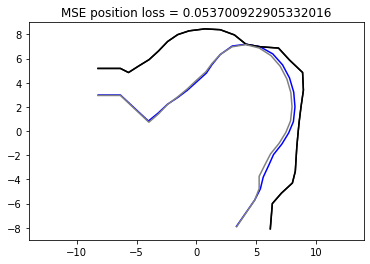

Predicted F:  [ 524.5 1623.  2430.  3563.5 4323.5]
Actual F:  [ 533.  1648.  2495.  3595.5 4355.5]
Avg err, F1-F3:  16.75


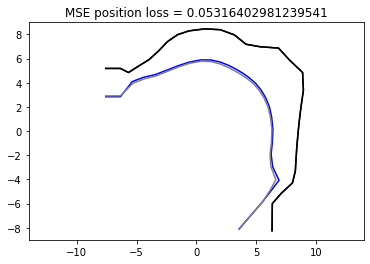

Predicted F:  [ 647.5 1467.5 2419.5 3627.5 4123.5]
Actual F:  [ 637.5 1497.5 2433.5 3577.5 4137.5]
Avg err, F1-F3:  20.0


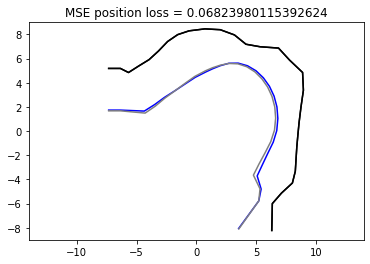

Predicted F:  [ 733.5 1335.5 2505.  3729.  4249. ]
Actual F:  [ 718.5 1355.  2501.  3709.  4205. ]
Avg err, F1-F3:  17.25


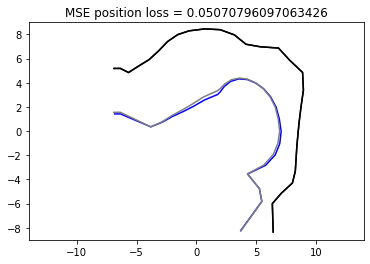

Predicted F:  [ 404.  1534.5 2384.5 3604.5 4541. ]
Actual F:  [ 413.  1584.  2416.5 3582.  4471. ]
Avg err, F1-F3:  29.25


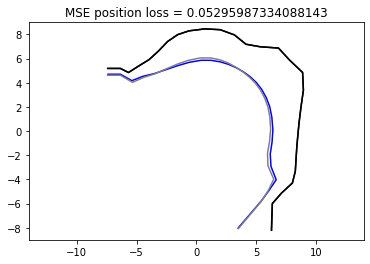

Predicted F:  [ 422.  1456.  2436.5 3574.5 4342. ]
Actual F:  [ 413.  1456.  2417.5 3574.5 4327. ]
Avg err, F1-F3:  4.5


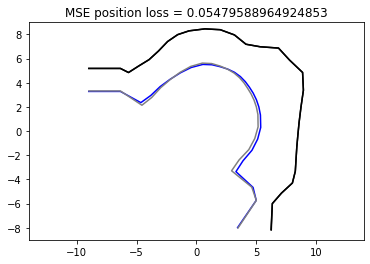

Predicted F:  [ 371.  1415.  2443.5 3591.  4367. ]
Actual F:  [ 355.  1413.5 2418.  3584.  4347. ]
Avg err, F1-F3:  8.75


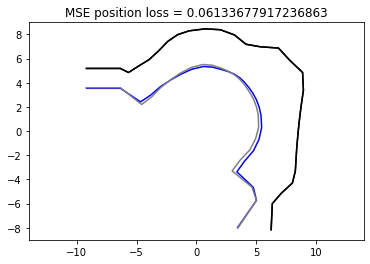

Predicted F:  [ 573.  1197.  2311.5 3492.5 4080.5]
Actual F:  [ 557.5 1189.5 2324.  3483.  4086. ]
Avg err, F1-F3:  11.5


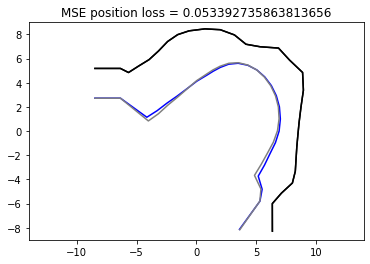

Predicted F:  [ 557.  1122.5 2267.  3425.5 4045.5]
Actual F:  [ 542.  1107.5 2278.  3442.5 4054.5]
Avg err, F1-F3:  15.0


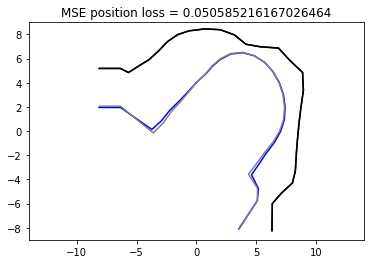

Predicted F:  [ 384.   859.5 2089.  3743.  3895. ]
Actual F:  [ 413.   981.5 2155.5 3778.5 3944.5]
Avg err, F1-F3:  75.5


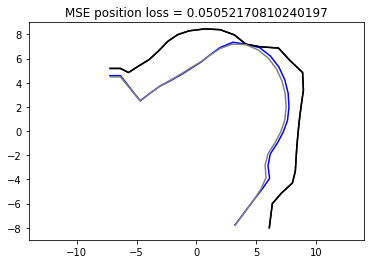

Predicted F:  [ 678.5 1489.5 2233.5 3233.5 3745.5]
Actual F:  [ 685.5 1496.5 2240.5 3240.5 3776.5]
Avg err, F1-F3:  7.0


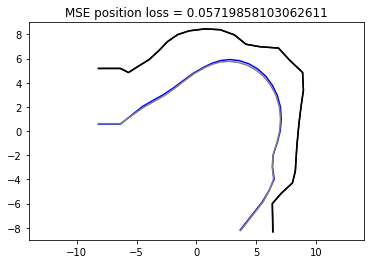

Predicted F:  [ 478.  1496.5 2597.5 3700.  4399. ]
Actual F:  [ 462.  1520.5 2579.5 3684.5 4379. ]
Avg err, F1-F3:  20.0


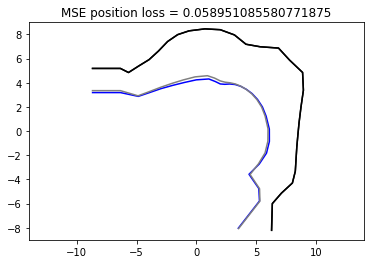

Predicted F:  [ 623.  1461.5 2374.  3398.  4006. ]
Actual F:  [ 629.  1473.5 2386.  3418.  4026. ]
Avg err, F1-F3:  9.0


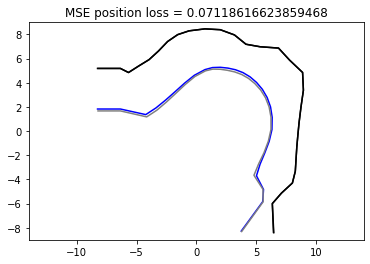

Predicted F:  [ 533.  1616.  2505.  3573.5 4309.5]
Actual F:  [ 518.5 1617.  2466.5 3544.  4288. ]
Avg err, F1-F3:  7.75


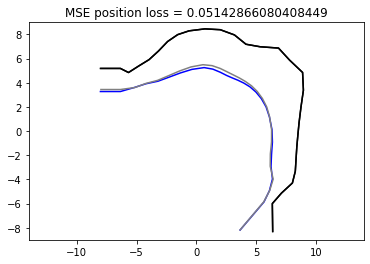

Predicted F:  [ 623.  1396.5 2349.  3762.5 4194.5]
Actual F:  [ 597.5 1419.5 2372.  3745.5 4185.5]
Avg err, F1-F3:  24.25


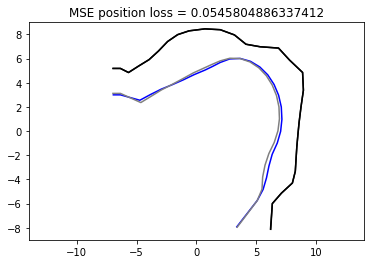

Predicted F:  [ 435.  1467.  2077.  3394.5 4928. ]
Actual F:  [ 395.  1625.5 2236.  3456.  4886. ]
Avg err, F1-F3:  99.25


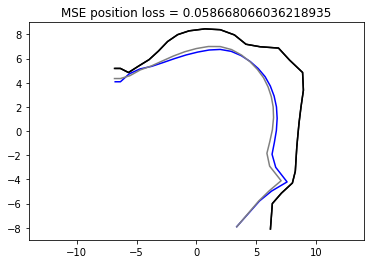

Predicted F:  [ 280.   813.5 2187.  3503.5 3883. ]
Actual F:  [ 280.   835.5 2217.5 3487.5 3904. ]
Avg err, F1-F3:  11.0


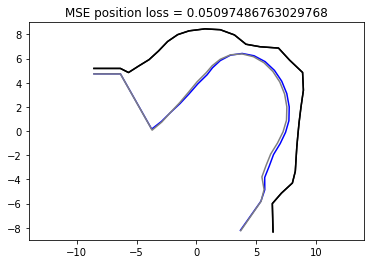

Predicted F:  [ 629.5 1314.5 2267.  3640.5 4016.5]
Actual F:  [ 613.  1340.5 2270.  3587.5 4003.5]
Avg err, F1-F3:  21.25


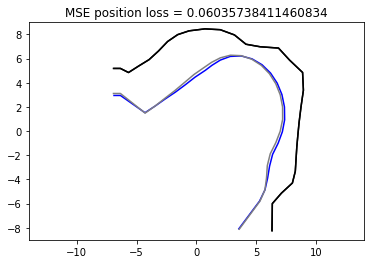

Predicted F:  [ 484.  1129.5 2282.  3525.  3892. ]
Actual F:  [ 493.  1131.5 2295.  3502.  3896. ]
Avg err, F1-F3:  5.5


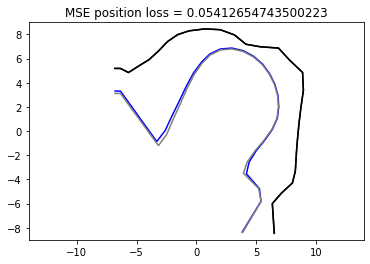

Predicted F:  [ 613.  1442.5 2391.  3576.5 4080.5]
Actual F:  [ 597.  1451.5 2391.  3552.5 4088.5]
Avg err, F1-F3:  12.5


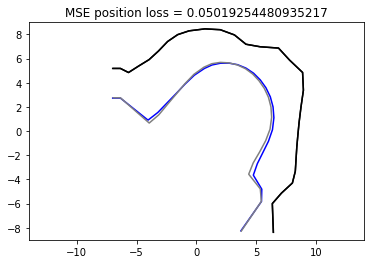

Predicted F:  [ 557.5 1190.  2337.  3551.  4096. ]
Actual F:  [ 548.5 1196.  2334.5 3540.5 4086. ]
Avg err, F1-F3:  7.5


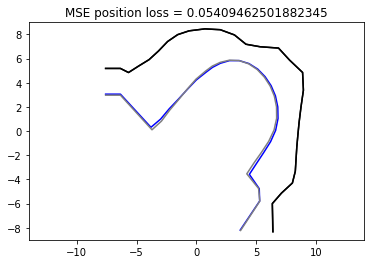

Predicted F:  [ 524.5 1180.5 2233.  3606.  4154. ]
Actual F:  [ 533.  1156.5 2226.  3582.5 4098. ]
Avg err, F1-F3:  16.25


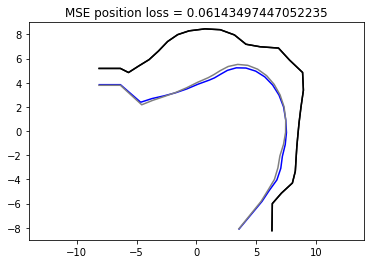

Predicted F:  [ 320.   632.5 2202.  3852.5 4351. ]
Actual F:  [ 486.   681.5 2152.  3806.5 4158.5]
Avg err, F1-F3:  107.5


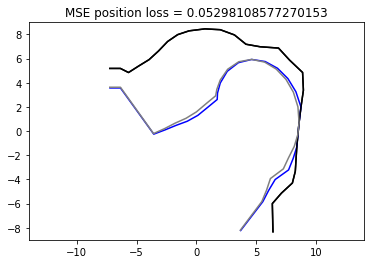

Predicted F:  [ 500.5 1810.5 2514.5 3746.5 4234.5]
Actual F:  [ 493.  1817.5 2489.5 3713.5 4209.5]
Avg err, F1-F3:  7.25


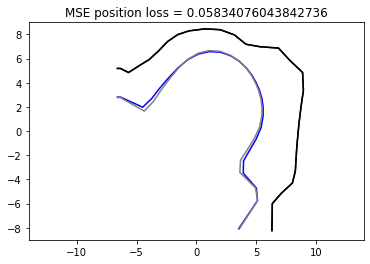

Predicted F:  [ 702.  1126.5 2135.  3569.5 3801.5]
Actual F:  [ 702.5 1175.5 2143.  3516.5 3780.5]
Avg err, F1-F3:  24.75


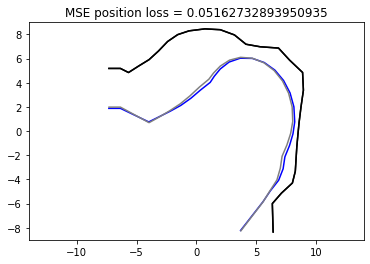

Predicted F:  [ 591.  1399.  2151.5 3460.  4376. ]
Actual F:  [ 558.5 1430.  2215.  3469.5 4288. ]
Avg err, F1-F3:  31.75


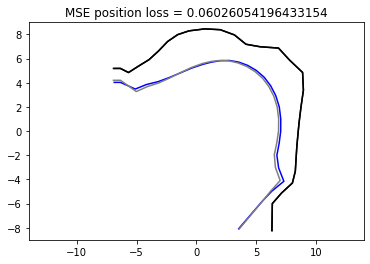

Predicted F:  [ 533.5 1890.5 2626.5 3706.5 4210.5]
Actual F:  [ 549.  1889.5 2585.5 3649.5 4201.5]
Avg err, F1-F3:  8.25


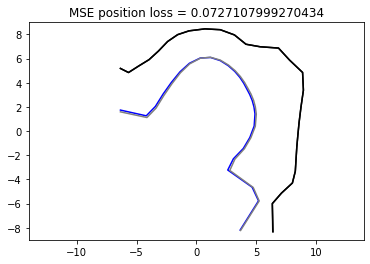

Predicted F:  [ 542.5 1882.5 2586.5 3650.5 4162.5]
Actual F:  [ 542.  1882.5 2578.5 3698.5 4202.5]
Avg err, F1-F3:  0.25


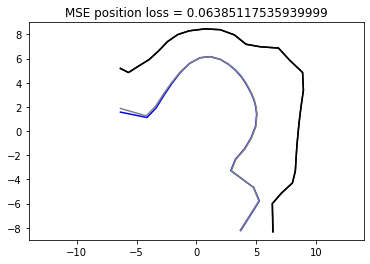

Predicted F:  [ 542.  1866.5 2586.5 3682.5 4226.5]
Actual F:  [ 542.  1860.5 2564.5 3676.5 4188.5]
Avg err, F1-F3:  3.0


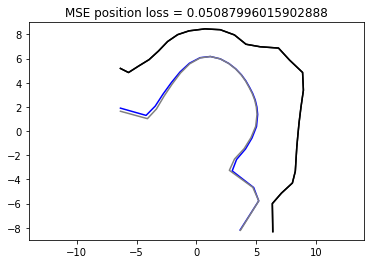

Predicted F:  [ 542.5 1836.5 2500.5 3620.5 4116.5]
Actual F:  [ 558.5 1802.5 2498.5 3642.5 4130.5]
Avg err, F1-F3:  25.0


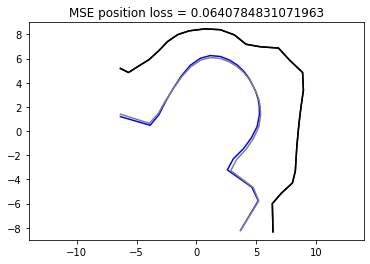

Predicted F:  [ 478.5 1440.5 2268.  3400.  4103. ]
Actual F:  [ 478.5 1465.5 2260.5 3368.  4062. ]
Avg err, F1-F3:  12.5


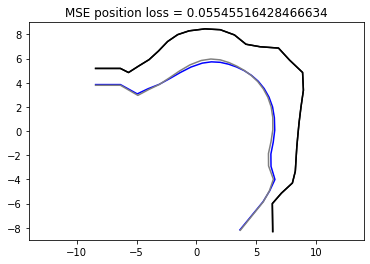

Predicted F:  [ 462.   969.5 2170.5 3552.5 4020.5]
Actual F:  [ 468.   959.5 2220.  3496.5 4020.5]
Avg err, F1-F3:  8.0


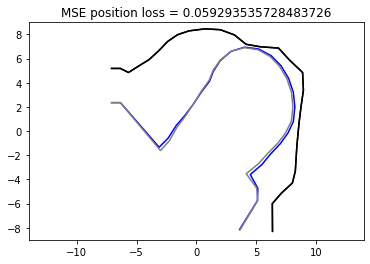

Predicted F:  [ 518.5 1578.5 2557.  3725.  4372. ]
Actual F:  [ 484.5 1583.5 2552.  3721.5 4394.5]
Avg err, F1-F3:  19.5


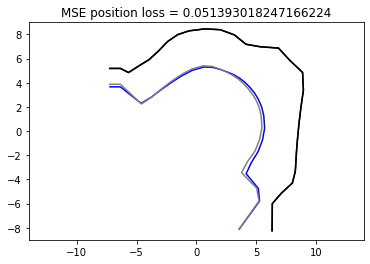

Predicted F:  [ 484.5 1557.  2495.5 3640.5 4310. ]
Actual F:  [ 493.5 1566.  2510.5 3638.5 4331.5]
Avg err, F1-F3:  9.0


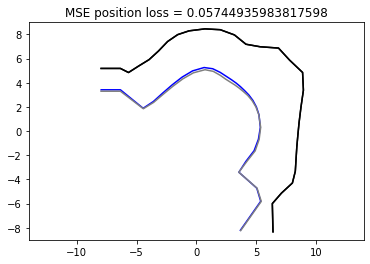

Predicted F:  [ 484.5 1518.  2456.  3611.5 4275. ]
Actual F:  [ 500.5 1527.5 2488.5 3617.  4295. ]
Avg err, F1-F3:  12.75


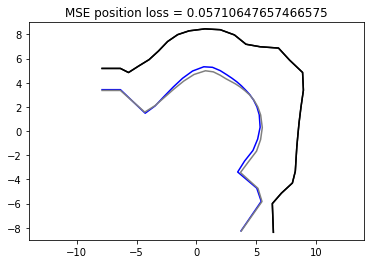

Predicted F:  [ 493.  1582.  2478.  3614.5 4280. ]
Actual F:  [ 500.5 1583.  2504.  3624.5 4308.5]
Avg err, F1-F3:  4.25


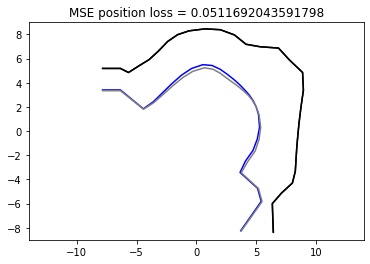

Predicted F:  [ 515.  1233.5 1641.5 2523.  3723.5]
Actual F:  [ 548.  1341.5 1702.5 2761.  3686.5]
Avg err, F1-F3:  70.5


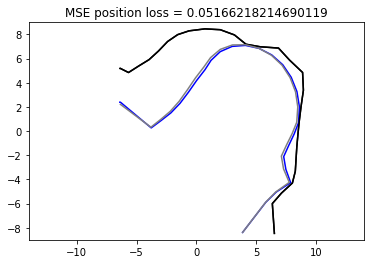

Predicted F:  [ 540.5 1387.5 1667.5 2693.  3723.5]
Actual F:  [ 513.5 1360.5 1664.5 2699.  3720.5]
Avg err, F1-F3:  27.0


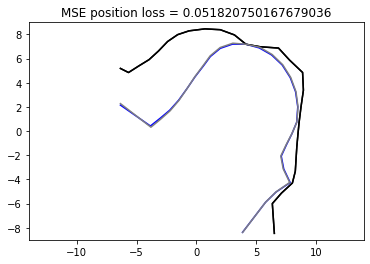

Predicted F:  [ 448.  1272.  1585.  2563.5 3763. ]
Actual F:  [ 488.  1232.  1520.  2403.5 3761. ]
Avg err, F1-F3:  40.0


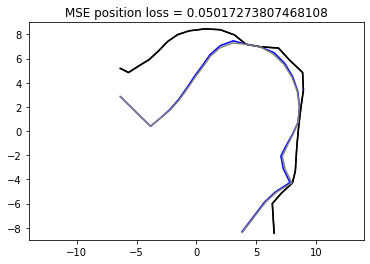

Predicted F:  [ 491.5 1458.5 1674.5 2838.5 3812.5]
Actual F:  [ 524.  1363.5 1611.5 2785.  3830.5]
Avg err, F1-F3:  63.75


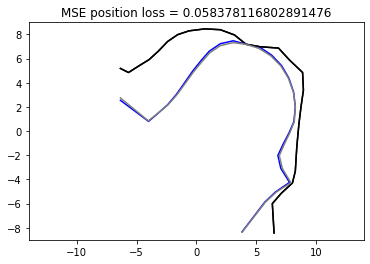

Predicted F:  [ 320.  1190.  2064.5 3415.5 4145. ]
Actual F:  [ 272. 1150. 1970. 3400. 4184.]
Avg err, F1-F3:  44.0


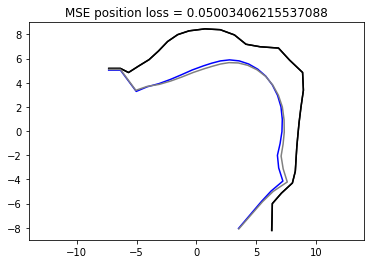

Predicted F:  [ 727.5 1264.5 2316.  3356.  4060. ]
Actual F:  [ 694.5 1312.5 2328.5 3360.5 4064.5]
Avg err, F1-F3:  40.5


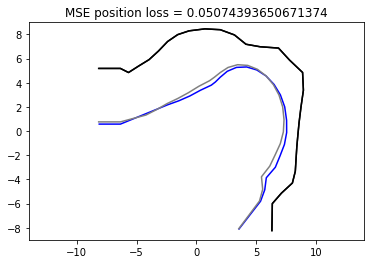

Predicted F:  [ 557.  1082.  2270.  3593.5 4017. ]
Actual F:  [ 533.  1051.5 2265.  3569.5 3995. ]
Avg err, F1-F3:  27.25


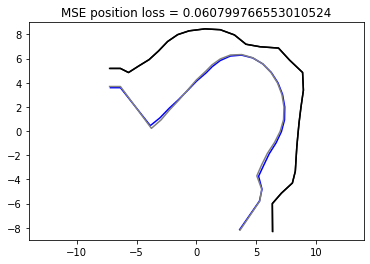

Predicted F:  [ 429.  1247.  2356.5 3519.5 4136. ]
Actual F:  [ 395.5 1228.  2344.  3492.  4110. ]
Avg err, F1-F3:  26.25


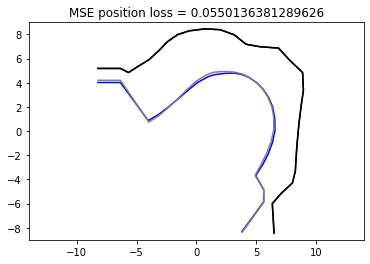

Predicted F:  [ 597.  1195.  2070.5 3249.  3894. ]
Actual F:  [ 567.  1151.  2076.  3240.  3896.5]
Avg err, F1-F3:  37.0


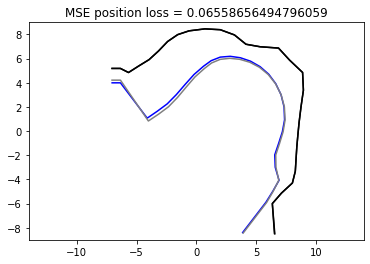

In [41]:
def plot_predict_vs_actual_vtconfigs(df_predict,df_actual):
    TC = np.array([1,1,0,0], 'float32')
    PC = np.array([0.00114,35000,1600,1.5,300000], 'float32')
    anc = 0.0
    for i in df_predict.index:
        plt.figure()
        AM_predict = np.zeros(7,dtype='float32')
        AM_vals_predict = df_predict.loc[i,pos_cols]
        AM_predict[0:len(AM_vals_predict)] = AM_vals_predict
        formant_predict,internal_x_predict,internal_y_predict,external_x_predict,external_y_predict= mda.maedaplant(5,29,29,29,29,TC,PC,AM_predict,anc)
        plt.plot(external_x_predict-10,external_y_predict-10,color='black')
        plt.plot(internal_x_predict-10,internal_y_predict-10,color='blue')
        AM_actual = np.zeros(7,dtype='float32')
        AM_vals_actual = df_actual.loc[i,pos_cols]
        AM_actual[0:len(AM_vals_actual)] = AM_vals_actual
        formant_actual,internal_x_actual,internal_y_actual,external_x_actual,external_y_actual= mda.maedaplant(5,29,29,29,29,TC,PC,AM_actual,anc)
        plt.plot(external_x_actual-10,external_y_actual-10,color='black')
        plt.plot(internal_x_actual-10,internal_y_actual-10,color='gray')
        plt.xlim([-14,14])
        plt.ylim([-9,9])
        position_mse = np.mean((AM_vals_predict-AM_vals_actual)**2)
        plt.title('MSE position loss = ' + str(predicted_a.loc[i,'mse_loss']))
        formant_error = np.mean(np.abs(formant_predict[0:2] - formant_actual[0:2]))
        print('Predicted F: ',formant_predict)
        print('Actual F: ', formant_actual)
        print('Avg err, F1-F3: ', formant_error)
        plt.show()
plot_predict_vs_actual_vtconfigs(predicted_a_large_err,actual_a)

In [42]:
print(predicted_a.shape)
pos_cols = ['jaw','tongue','shape','apex','lip_ht','lip_pr']
predicted_a_constrained = predicted_a[pos_cols]
predicted_a_constrained = predicted_a_constrained[predicted_a_constrained <= 3]
predicted_a_constrained = predicted_a_constrained[predicted_a_constrained >= -3]
predicted_a_constrained.dropna(how='any',axis=0,inplace=True)
predicted_a_constrained['mse_loss'] = predicted_a['mse_loss'][predicted_a_constrained.index]
predicted_a_constrained['avg_error'] = predicted_a['avg_error'][predicted_a_constrained.index]
predicted_a_constrained.shape

(19314, 15)


(12857, 8)

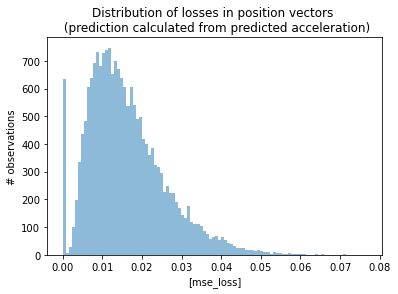

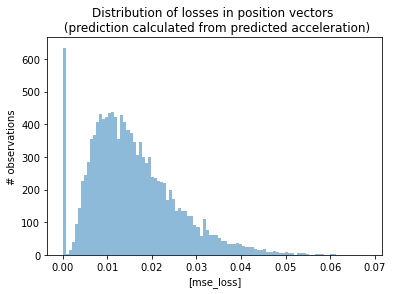

In [43]:
draw_loss_dist(predicted_a)
draw_loss_dist(predicted_a_constrained)

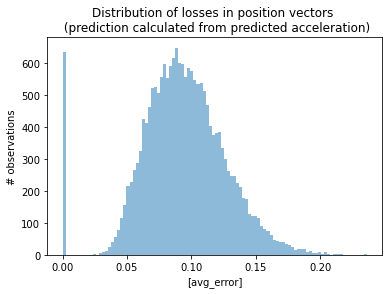

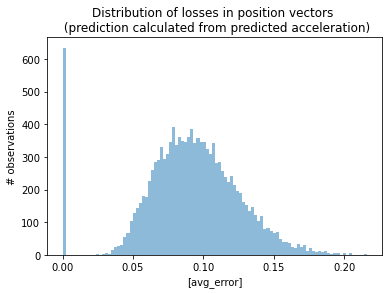

In [44]:
draw_loss_dist(predicted_a,loss_col='avg_error')
draw_loss_dist(predicted_a_constrained,loss_col='avg_error')

Predicted F:  [ 679.  1553.5 2565.  3733.  4405. ]
Actual F:  [ 669.5 1541.5 2524.5 3653.5 4357.5]
Avg err, F1-F3:  10.75


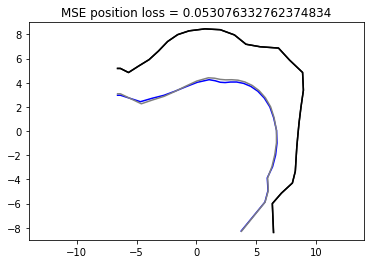

Predicted F:  [ 573.5 1456.5 2384.  3524.5 4084.5]
Actual F:  [ 597.  1430.  2391.  3539.5 4099.5]
Avg err, F1-F3:  25.0


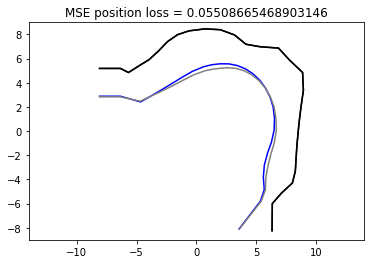

Predicted F:  [ 693.5 1520.5 2520.5 3480.5 4160.5]
Actual F:  [ 685.  1527.5 2487.5 3487.5 4135.5]
Avg err, F1-F3:  7.75


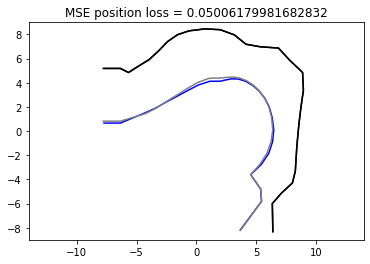

Predicted F:  [ 567.  1344.  1985.  3284.5 4031. ]
Actual F:  [ 558.  1461.  2093.5 3295.5 3986. ]
Avg err, F1-F3:  63.0


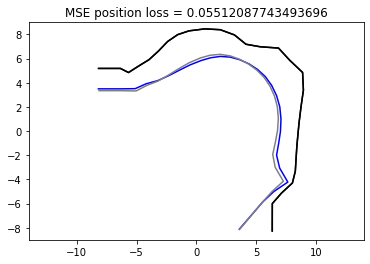

Predicted F:  [ 551.  1149.5 1872.  3261.5 4145. ]
Actual F:  [ 558.  1279.5 1961.  3286.  4146. ]
Avg err, F1-F3:  68.5


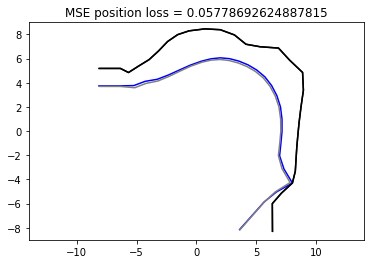

Predicted F:  [ 478.  1504.5 2145.5 3324.  4176. ]
Actual F:  [ 462.  1545.5 2209.  3324.  4105.5]
Avg err, F1-F3:  28.5


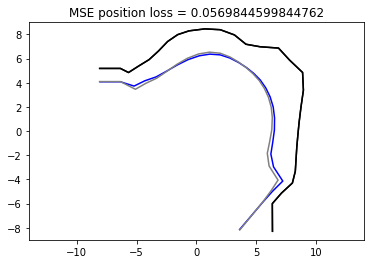

Predicted F:  [ 582.5 1377.  2420.  3753.5 4241.5]
Actual F:  [ 573.  1380.5 2415.  3724.5 4236.5]
Avg err, F1-F3:  6.5


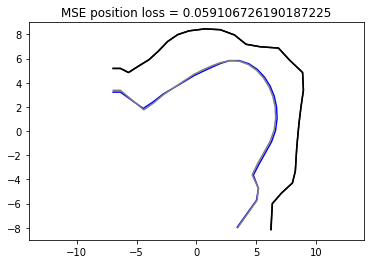

Predicted F:  [ 591.  1238.5 2309.  3610.5 4076. ]
Actual F:  [ 564.5 1233.5 2322.  3606.5 4081.5]
Avg err, F1-F3:  15.75


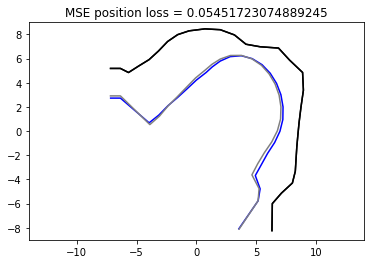

Predicted F:  [ 502.5 1166.  2322.5 3526.5 4083.5]
Actual F:  [ 511.  1190.  2337.5 3533.5 4114.5]
Avg err, F1-F3:  16.25


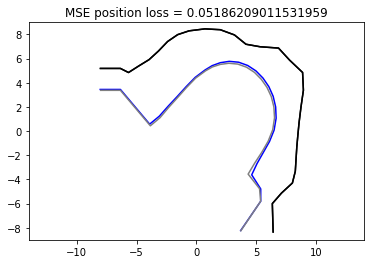

Predicted F:  [ 542.  1086.  2258.  3467.5 3919.5]
Actual F:  [ 527.  1110.5 2281.  3476.5 3961. ]
Avg err, F1-F3:  19.75


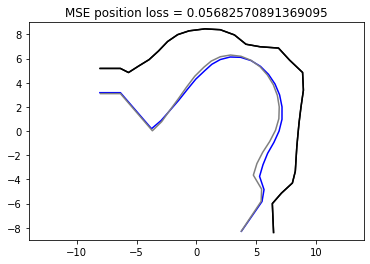

Predicted F:  [ 296.  1230.  2248.5 3519.  4160. ]
Actual F:  [ 380.  1291.5 2296.  3564.5 4230. ]
Avg err, F1-F3:  72.75


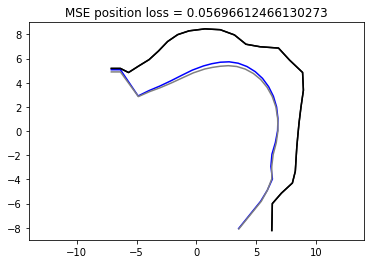

Predicted F:  [ 453.  1307.  2052.  3491.5 4840. ]
Actual F:  [ 429.  1229.  2022.  3501.5 4868. ]
Avg err, F1-F3:  51.0


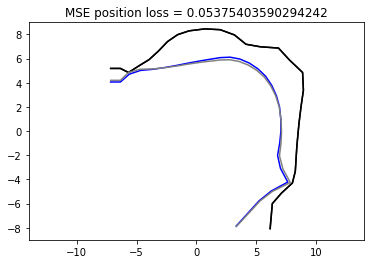

Predicted F:  [ 347.5 1483.5 2508.5 3737.5 4412. ]
Actual F:  [ 355.  1510.  2547.  3756.5 4462. ]
Avg err, F1-F3:  17.0


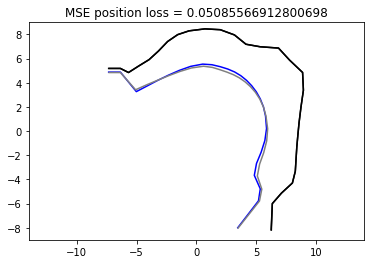

Predicted F:  [ 493.  1543.  2529.  3763.5 4406. ]
Actual F:  [ 518.5 1536.  2547.5 3781.5 4444. ]
Avg err, F1-F3:  16.25


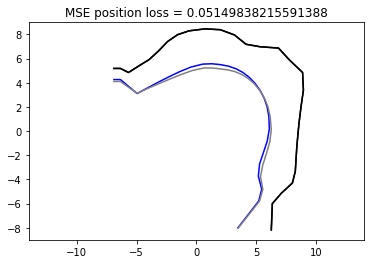

Predicted F:  [ 613.5 1496.5 2506.  3715.5 4315.5]
Actual F:  [ 613.  1507.5 2483.  3679.5 4287.5]
Avg err, F1-F3:  5.75


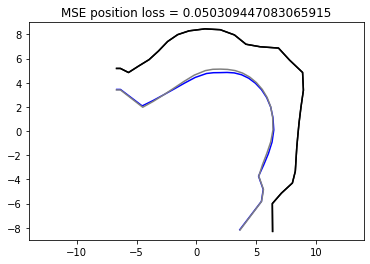

Predicted F:  [ 573.5 1271.5 2355.5 3582.5 4114. ]
Actual F:  [ 574.5 1295.5 2361.5 3572.5 4128. ]
Avg err, F1-F3:  12.5


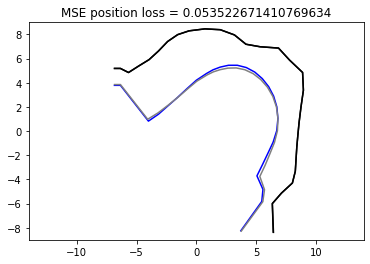

Predicted F:  [ 591.  1305.5 2364.  3575.5 4154.5]
Actual F:  [ 597.5 1269.5 2353.5 3578.5 4113. ]
Avg err, F1-F3:  21.25


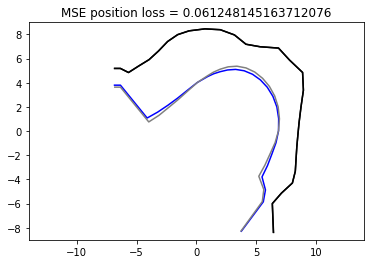

Predicted F:  [ 484.  1526.5 2481.5 3629.5 4141.5]
Actual F:  [ 469.5 1592.  2513.  3605.5 4157.5]
Avg err, F1-F3:  40.0


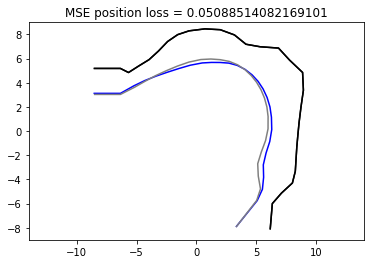

Predicted F:  [ 395.5 1093.  2332.  3543.5 4176.5]
Actual F:  [ 413.  1107.5 2328.5 3531.  4180. ]
Avg err, F1-F3:  16.0


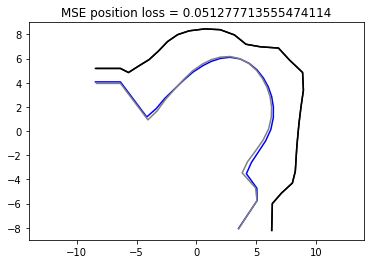

Predicted F:  [ 502.   923.  2218.  3599.5 3978.5]
Actual F:  [ 478.5  899.  2228.  3586.5 3974.5]
Avg err, F1-F3:  23.75


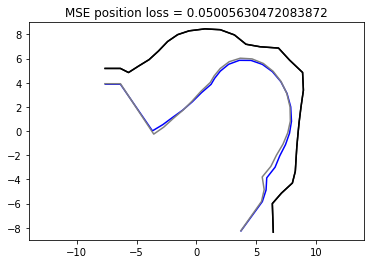

Predicted F:  [ 613.  1204.5 2358.  3538.5 4101.5]
Actual F:  [ 606.  1179.5 2365.5 3537.5 4124.5]
Avg err, F1-F3:  16.0


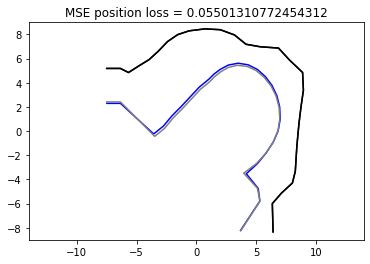

Predicted F:  [ 662.  1496.5 2440.5 3576.5 4096.5]
Actual F:  [ 637.5 1561.5 2417.5 3537.5 4073.5]
Avg err, F1-F3:  44.75


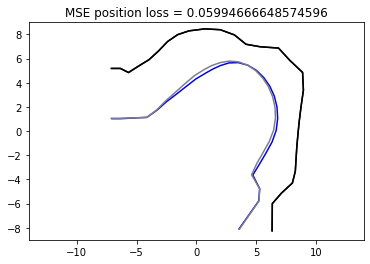

Predicted F:  [ 653.  1567.5 2495.5 3599.5 4159.5]
Actual F:  [ 653.  1583.5 2495.5 3591.5 4167.5]
Avg err, F1-F3:  8.0


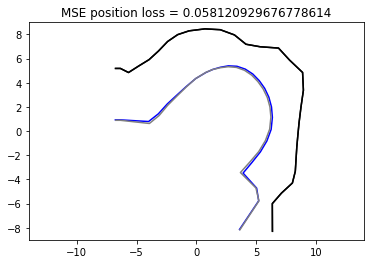

Predicted F:  [ 678.  1124.  2343.5 3748.5 4228.5]
Actual F:  [ 671.  1164.5 2344.5 3709.5 4181.5]
Avg err, F1-F3:  23.75


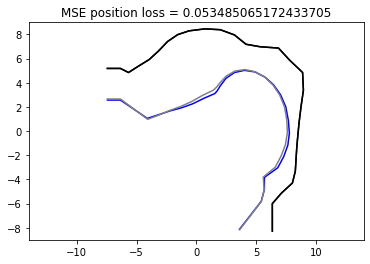

Predicted F:  [ 703.5 1221.5 2336.  3660.5 4124.5]
Actual F:  [ 687.5 1205.5 2311.  3668.5 4092.5]
Avg err, F1-F3:  16.0


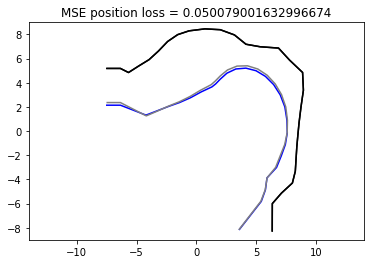

Predicted F:  [ 484.5 1423.  2354.5 3575.  4238. ]
Actual F:  [ 453.  1430.5 2360.  3551.  4216. ]
Avg err, F1-F3:  19.5


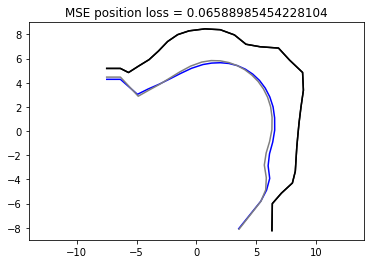

Predicted F:  [ 413.5 1254.5 2340.  3538.  4154.5]
Actual F:  [ 422.  1312.  2357.  3530.5 4169.5]
Avg err, F1-F3:  33.0


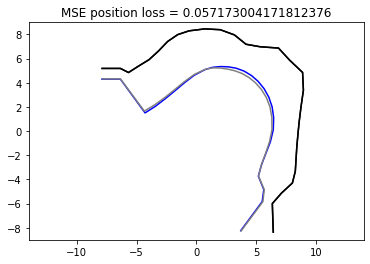

Predicted F:  [ 548.5 1371.5 2093.5 3427.  4126. ]
Actual F:  [ 533. 1350. 2126. 3443. 4046.]
Avg err, F1-F3:  18.5


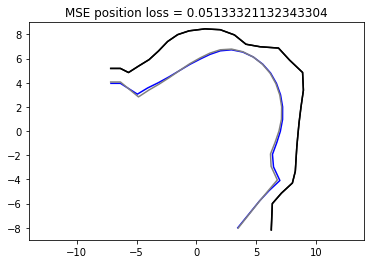

Predicted F:  [ 647.  1377.  2488.5 3697.5 4257.5]
Actual F:  [ 638.  1381.5 2456.  3652.5 4220.5]
Avg err, F1-F3:  6.75


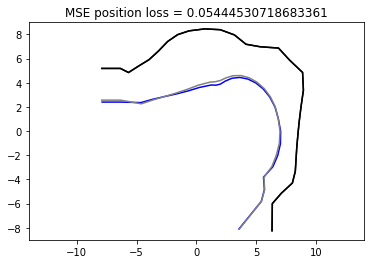

Predicted F:  [ 631.  1722.5 2618.5 3642.5 4170.5]
Actual F:  [ 638.5 1722.5 2634.5 3634.5 4202.5]
Avg err, F1-F3:  3.75


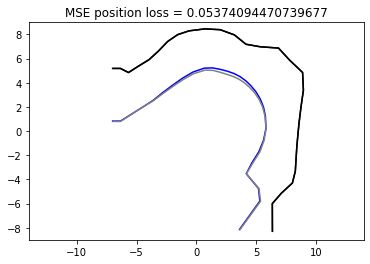

Predicted F:  [ 742.5 1239.5 2386.  3674.  4154. ]
Actual F:  [ 742.  1263.5 2383.5 3623.5 4103.5]
Avg err, F1-F3:  12.25


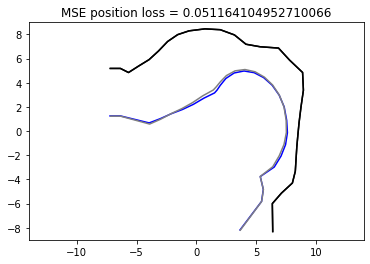

Predicted F:  [ 429.  1616.5 2763.5 4069.5 4808. ]
Actual F:  [ 395.5 1662.5 2842.  4131.5 4894. ]
Avg err, F1-F3:  39.75


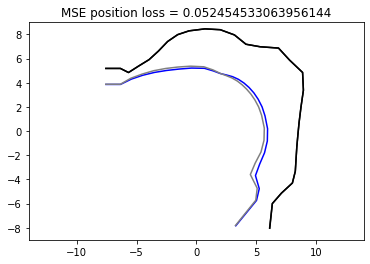

Predicted F:  [ 518.5 1770.  2701.  3693.  4173. ]
Actual F:  [ 518.  1800.5 2715.  3667.  4219. ]
Avg err, F1-F3:  15.5


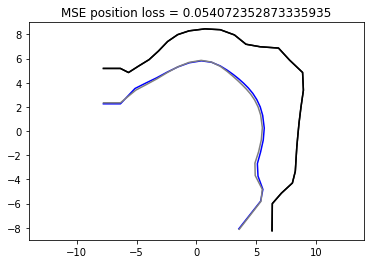

Predicted F:  [ 478.  1062.  2170.5 3505.  3983. ]
Actual F:  [ 462.  1062.  2185.  3486.5 3965. ]
Avg err, F1-F3:  8.0


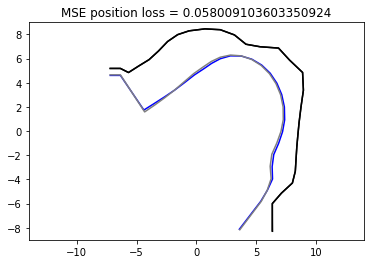

Predicted F:  [ 389.5 1417.5 2510.  3712.5 4400. ]
Actual F:  [ 389.  1400.5 2469.5 3666.5 4347.5]
Avg err, F1-F3:  8.75


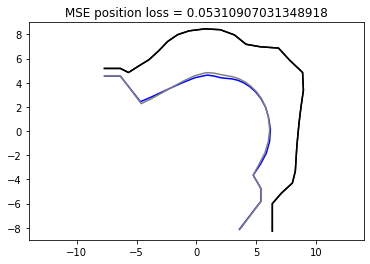

Predicted F:  [ 663.  1162.5 1876.5 3248.  3621. ]
Actual F:  [ 678.  1132.5 1942.  3332.5 3644.5]
Avg err, F1-F3:  22.5


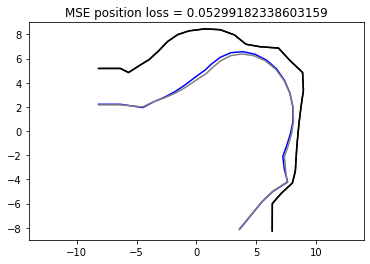

Predicted F:  [ 349.   829.  2294.  3586.  4139.5]
Actual F:  [ 296.   794.5 2300.  3543.5 4135. ]
Avg err, F1-F3:  43.75


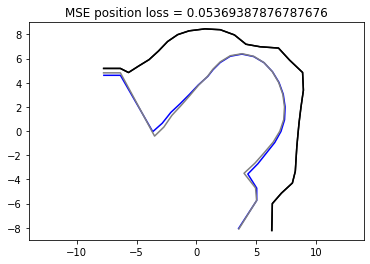

Predicted F:  [ 380. 1349. 2368. 3538. 4194.]
Actual F:  [ 380.  1351.  2394.  3582.5 4237.5]
Avg err, F1-F3:  1.0


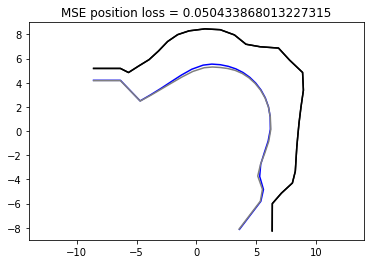

Predicted F:  [ 678.5 1511.  2395.  3491.  4011. ]
Actual F:  [ 678.  1534.5 2386.  3482.  3962. ]
Avg err, F1-F3:  12.0


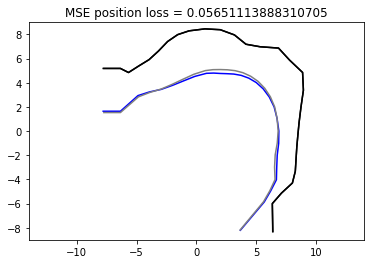

Predicted F:  [ 620.5 1452.5 2361.  3590.5 4134.5]
Actual F:  [ 629.5 1476.5 2389.  3602.5 4178.5]
Avg err, F1-F3:  16.5


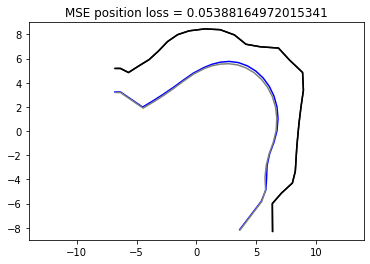

Predicted F:  [ 524.5 1623.  2430.  3563.5 4323.5]
Actual F:  [ 533.  1648.  2495.  3595.5 4355.5]
Avg err, F1-F3:  16.75


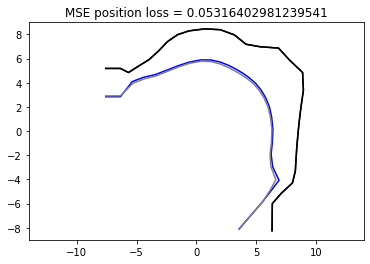

Predicted F:  [ 647.5 1467.5 2419.5 3627.5 4123.5]
Actual F:  [ 637.5 1497.5 2433.5 3577.5 4137.5]
Avg err, F1-F3:  20.0


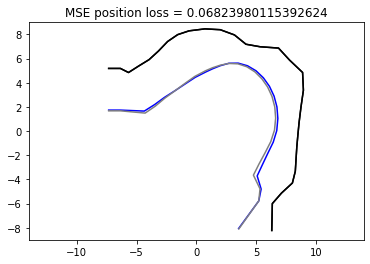

Predicted F:  [ 404.  1534.5 2384.5 3604.5 4541. ]
Actual F:  [ 413.  1584.  2416.5 3582.  4471. ]
Avg err, F1-F3:  29.25


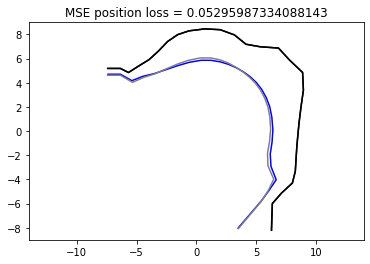

Predicted F:  [ 557.  1122.5 2267.  3425.5 4045.5]
Actual F:  [ 542.  1107.5 2278.  3442.5 4054.5]
Avg err, F1-F3:  15.0


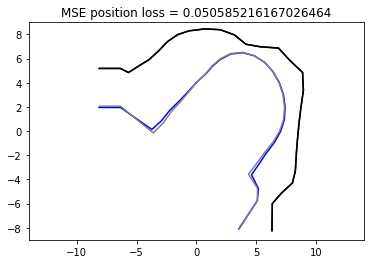

Predicted F:  [ 533.  1616.  2505.  3573.5 4309.5]
Actual F:  [ 518.5 1617.  2466.5 3544.  4288. ]
Avg err, F1-F3:  7.75


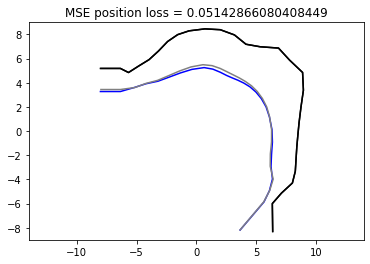

Predicted F:  [ 623.  1396.5 2349.  3762.5 4194.5]
Actual F:  [ 597.5 1419.5 2372.  3745.5 4185.5]
Avg err, F1-F3:  24.25


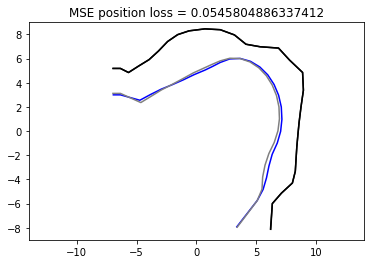

Predicted F:  [ 280.   813.5 2187.  3503.5 3883. ]
Actual F:  [ 280.   835.5 2217.5 3487.5 3904. ]
Avg err, F1-F3:  11.0


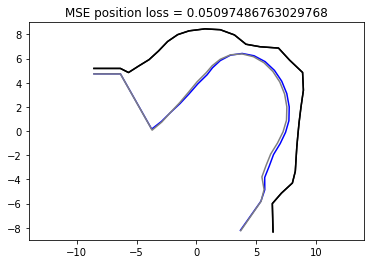

Predicted F:  [ 629.5 1314.5 2267.  3640.5 4016.5]
Actual F:  [ 613.  1340.5 2270.  3587.5 4003.5]
Avg err, F1-F3:  21.25


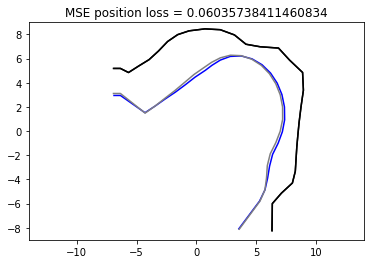

Predicted F:  [ 613.  1442.5 2391.  3576.5 4080.5]
Actual F:  [ 597.  1451.5 2391.  3552.5 4088.5]
Avg err, F1-F3:  12.5


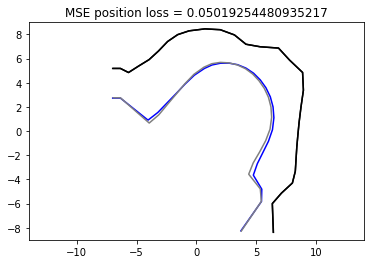

Predicted F:  [ 557.5 1190.  2337.  3551.  4096. ]
Actual F:  [ 548.5 1196.  2334.5 3540.5 4086. ]
Avg err, F1-F3:  7.5


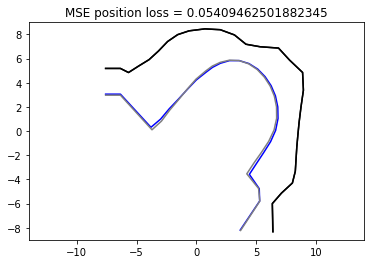

Predicted F:  [ 524.5 1180.5 2233.  3606.  4154. ]
Actual F:  [ 533.  1156.5 2226.  3582.5 4098. ]
Avg err, F1-F3:  16.25


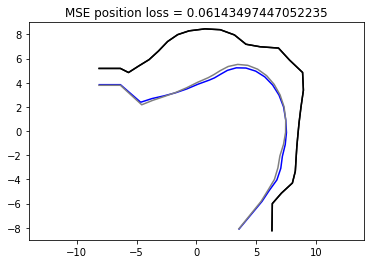

Predicted F:  [ 500.5 1810.5 2514.5 3746.5 4234.5]
Actual F:  [ 493.  1817.5 2489.5 3713.5 4209.5]
Avg err, F1-F3:  7.25


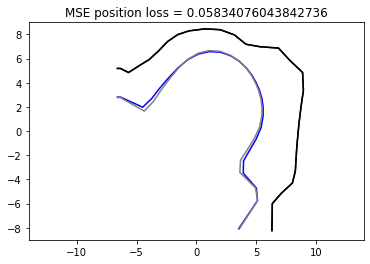

Predicted F:  [ 702.  1126.5 2135.  3569.5 3801.5]
Actual F:  [ 702.5 1175.5 2143.  3516.5 3780.5]
Avg err, F1-F3:  24.75


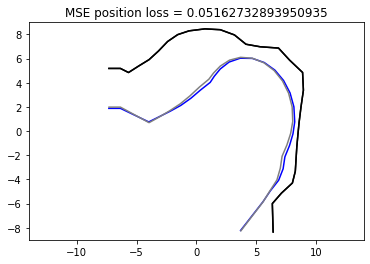

Predicted F:  [ 591.  1399.  2151.5 3460.  4376. ]
Actual F:  [ 558.5 1430.  2215.  3469.5 4288. ]
Avg err, F1-F3:  31.75


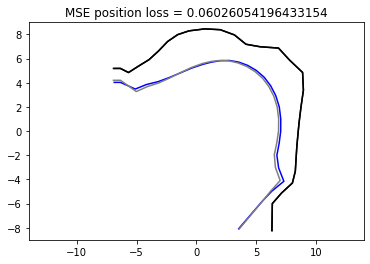

Predicted F:  [ 478.5 1440.5 2268.  3400.  4103. ]
Actual F:  [ 478.5 1465.5 2260.5 3368.  4062. ]
Avg err, F1-F3:  12.5


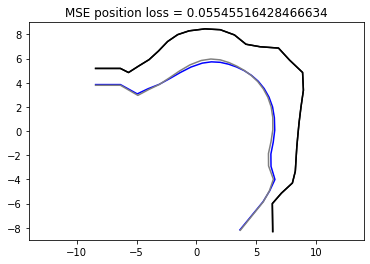

Predicted F:  [ 518.5 1578.5 2557.  3725.  4372. ]
Actual F:  [ 484.5 1583.5 2552.  3721.5 4394.5]
Avg err, F1-F3:  19.5


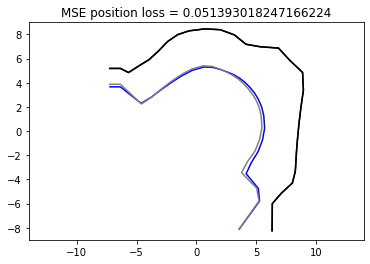

Predicted F:  [ 484.5 1557.  2495.5 3640.5 4310. ]
Actual F:  [ 493.5 1566.  2510.5 3638.5 4331.5]
Avg err, F1-F3:  9.0


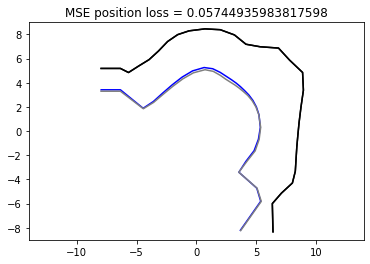

Predicted F:  [ 493.  1582.  2478.  3614.5 4280. ]
Actual F:  [ 500.5 1583.  2504.  3624.5 4308.5]
Avg err, F1-F3:  4.25


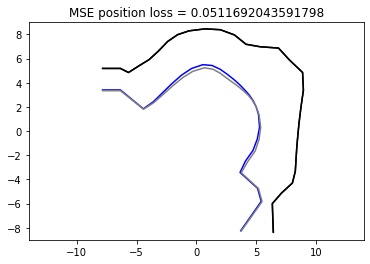

Predicted F:  [ 320.  1190.  2064.5 3415.5 4145. ]
Actual F:  [ 272. 1150. 1970. 3400. 4184.]
Avg err, F1-F3:  44.0


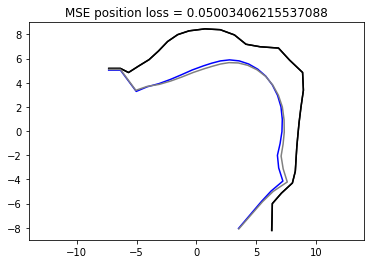

Predicted F:  [ 727.5 1264.5 2316.  3356.  4060. ]
Actual F:  [ 694.5 1312.5 2328.5 3360.5 4064.5]
Avg err, F1-F3:  40.5


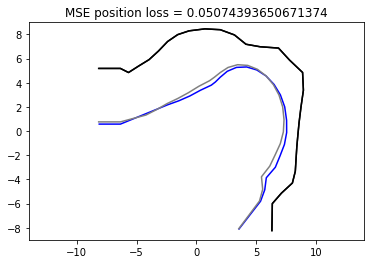

Predicted F:  [ 557.  1082.  2270.  3593.5 4017. ]
Actual F:  [ 533.  1051.5 2265.  3569.5 3995. ]
Avg err, F1-F3:  27.25


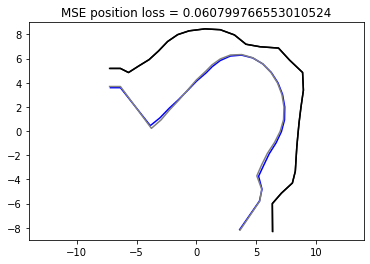

In [45]:
predicted_a_constrained_large_err = predicted_a_constrained[predicted_a_constrained['mse_loss'] > 0.05]
plot_predict_vs_actual_vtconfigs(predicted_a_constrained_large_err[pos_cols],actual_a)

In [1]:
for maeda_param in ['jaw','tongue','shape','apex','lip_ht','lip_pr','jaw_dot','tongue_dot','shape_dot','apex_dot','lip_ht_dot','lip_pr_dot']:
    fig = sns.jointplot(x=predicted_a[maeda_param],y=actual_a[maeda_param],kind='kde',color='gray')
    fig.plot_joint(plt.scatter, c="black", s=2, linewidth=1, marker=".",alpha=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xlim([-0.2,0.2])
    plt.ylim([-0.2,0.2])
    plt.title(maeda_param)
    plt.tight_layout()
    plt.show()

NameError: name 'sns' is not defined